In [1]:
# ================================================================
# TASK RF.1: CHOOSE CLEANED DATASET TO USE
# ================================================================

import pandas as pd

# Options:
# "cleaned_student-mat.csv"
# "cleaned_student-por.csv"

DATASET = "cleaned_student-mat.csv"   # <-- Change here anytime
df = pd.read_csv(DATASET)

print("Loaded:", DATASET)
df.head()


Loaded: cleaned_student-mat.csv


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1


In [2]:
# ================================================================
# TASK RF.2: PREPARE FEATURES AND TARGET (USE G1 ONLY)
# ================================================================

# Target variable: passed
y = df["passed"]

# Remove leakage: G2 and G3, and remove target itself
columns_to_drop = ["passed", "G2", "G3"]
columns_to_drop = [c for c in columns_to_drop if c in df.columns]

X = df.drop(columns=columns_to_drop)

print("Dropped columns:", columns_to_drop)
print("Feature shape:", X.shape)


Dropped columns: ['passed', 'G2', 'G3']
Feature shape: (395, 31)


In [3]:
# ================================================================
# TASK RF.3: ONE-HOT ENCODE CATEGORICAL FEATURES
# ================================================================

X = pd.get_dummies(X, drop_first=True)
X.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


In [4]:
# ================================================================
# TASK RF.4: TRAIN/TEST SPLIT
# ================================================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (316, 40) Test: (79, 40)


In [5]:
# ================================================================
# TASK RF.5: TRAIN RANDOM FOREST MODEL
# ================================================================

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

rf.fit(X_train, y_train)

print("Random Forest model trained.")


Random Forest model trained.


In [6]:
# ================================================================
# TASK RF.6: MODEL EVALUATION (ACCURACY + REPORT)
# ================================================================

from sklearn.metrics import accuracy_score, classification_report

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7848101265822784

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.69      0.68        26
           1       0.85      0.83      0.84        53

    accuracy                           0.78        79
   macro avg       0.76      0.76      0.76        79
weighted avg       0.79      0.78      0.79        79



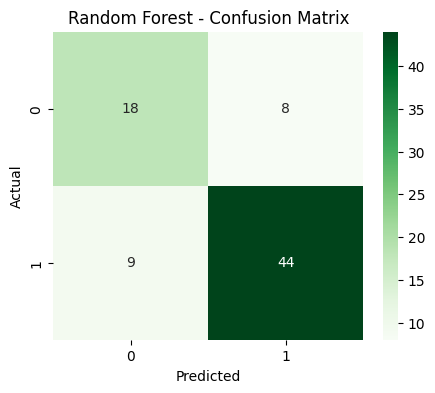

In [7]:
# ================================================================
# TASK RF.7: CONFUSION MATRIX
# ================================================================

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()
